## Install Libraries

In [1]:
!pip3 install -r requirements_current.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [3]:
import importlib

In [4]:
import pandas as pd

In [5]:
import models
import parameters
import preprocessing

In [6]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/kevinchs0808/Desktop/DSA4263/final-project/preprocessing.py'>

# Import Dataset

In [7]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [8]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [9]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [10]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [11]:
rf_model.train()
rf_model.predict()

In [12]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.81,
 'precision': 0.6571428571428571,
 'recall': 0.46938775510204084,
 'f1_score': 0.5476190476190477}

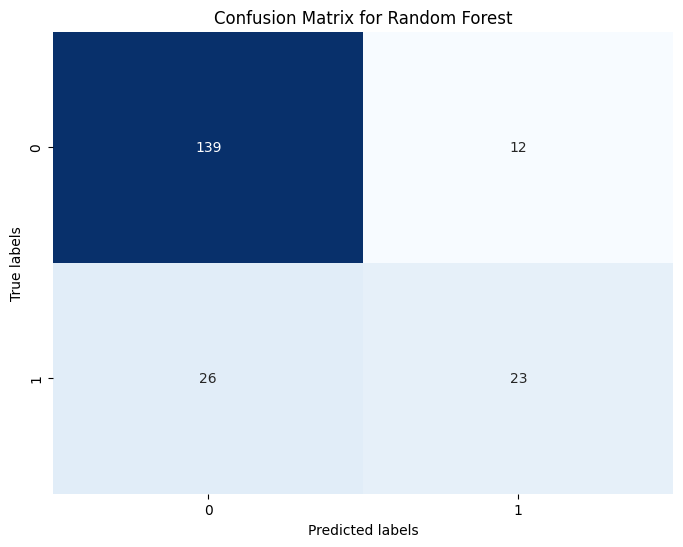

In [13]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [14]:
rf_model.finetune()

[I 2024-04-04 17:31:57,489] A new study created in memory with name: no-name-d487a80d-f3d4-4bb0-bbd8-99eff38a2b04
[I 2024-04-04 17:31:58,728] Trial 0 finished with value: 0.5728571208265865 and parameters: {'n_estimators': 24, 'max_depth': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5728571208265865.
[I 2024-04-04 17:31:59,981] Trial 1 finished with value: 0.6312162546177892 and parameters: {'n_estimators': 28, 'max_depth': 5, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.6312162546177892.
[I 2024-04-04 17:32:01,228] Trial 2 finished with value: 0.5629038005564465 and parameters: {'n_estimators': 21, 'max_depth': 10, 'criterion': 'entropy'}. Best is trial 1 with value: 0.6312162546177892.
[I 2024-04-04 17:32:02,468] Trial 3 finished with value: 0.5908095238095238 and parameters: {'n_estimators': 30, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 1 with value: 0.6312162546177892.
[I 2024-04-04 17:32:03,677] Trial 4 finished with value: 0.6060606060606061 and

(0.6490291498230527,
 {'n_estimators': 29, 'max_depth': 5, 'criterion': 'entropy'})

In [15]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.825,
 'precision': 0.6346153846153846,
 'recall': 0.673469387755102,
 'f1_score': 0.6534653465346534}

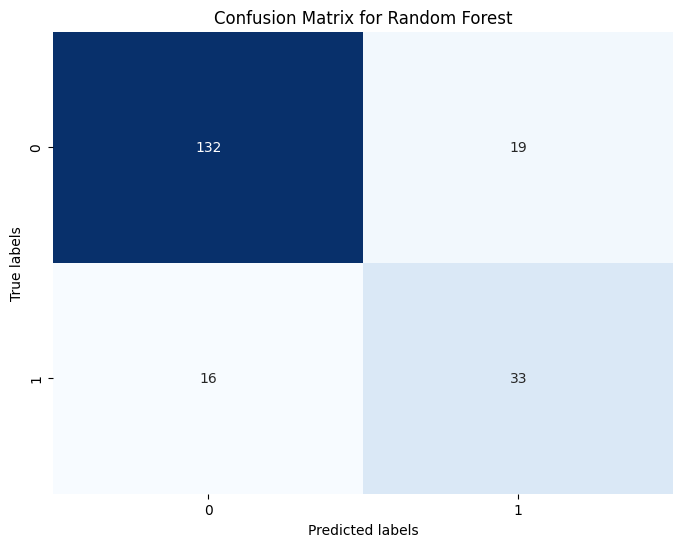

In [16]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

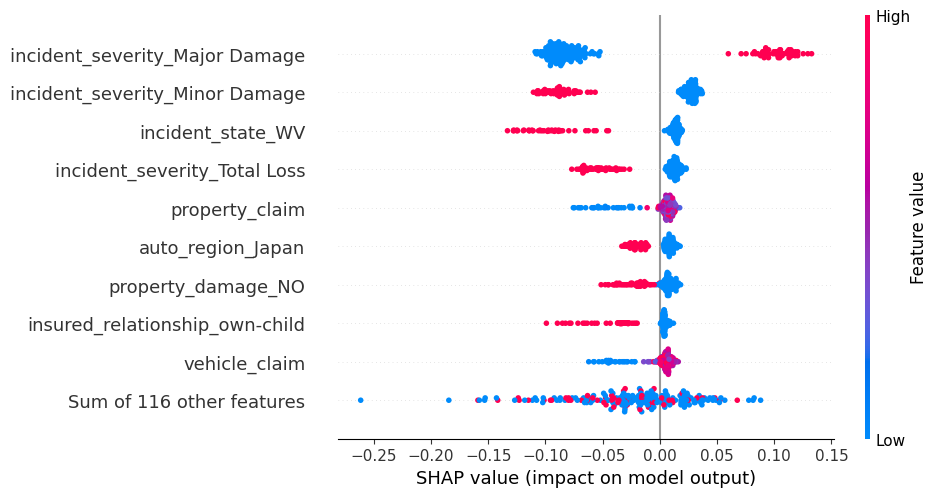

In [17]:
rf_model.shap_explanation(is_tree=True, class_to_observe=1)

# Decision Tree

In [18]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [19]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [20]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [21]:
dt_model.train()
dt_model.predict()

In [22]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.775,
 'precision': 0.5357142857142857,
 'recall': 0.6122448979591837,
 'f1_score': 0.5714285714285714}

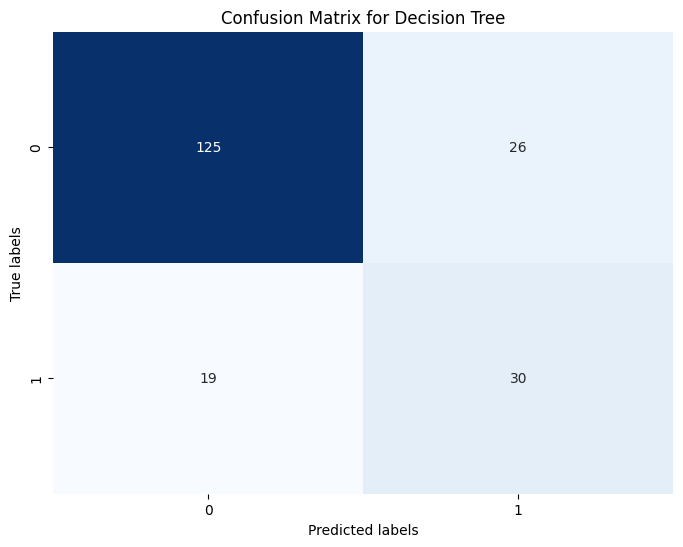

In [23]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [24]:
dt_model.finetune()

[I 2024-04-04 17:34:01,316] A new study created in memory with name: no-name-fe3e01a5-e9f4-47f7-964c-aea9803d2e64
[I 2024-04-04 17:34:02,475] Trial 0 finished with value: 0.6679901955264275 and parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6679901955264275.
[I 2024-04-04 17:34:03,644] Trial 1 finished with value: 0.6018183421889395 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6679901955264275.
[I 2024-04-04 17:34:04,814] Trial 2 finished with value: 0.6375204598226181 and parameters: {'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6679901955264275.
[I 2024-04-04 17:34:06,018] Trial 3 finished with value: 0.6210946676062955 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6679901955264275.
[I 2024-04-04 17:34:07,275] Trial 4 finished with value: 0.6089956

(0.672373838143585,
 {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2})

In [25]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.735,
 'precision': 0.4666666666666667,
 'recall': 0.5714285714285714,
 'f1_score': 0.5137614678899083}

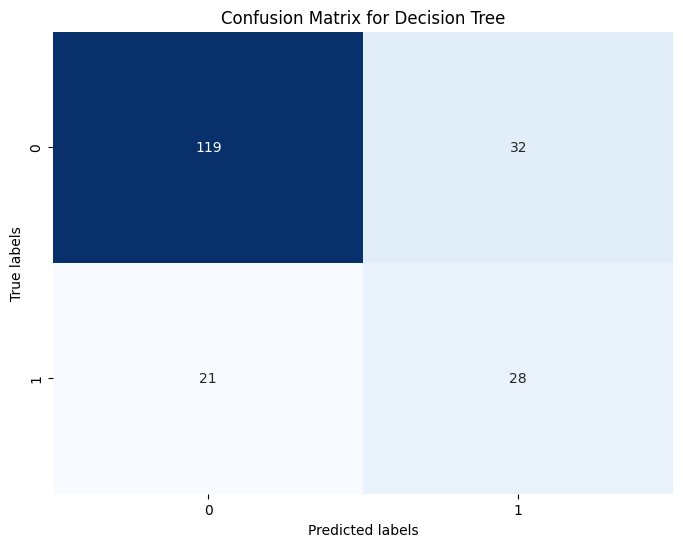

In [26]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

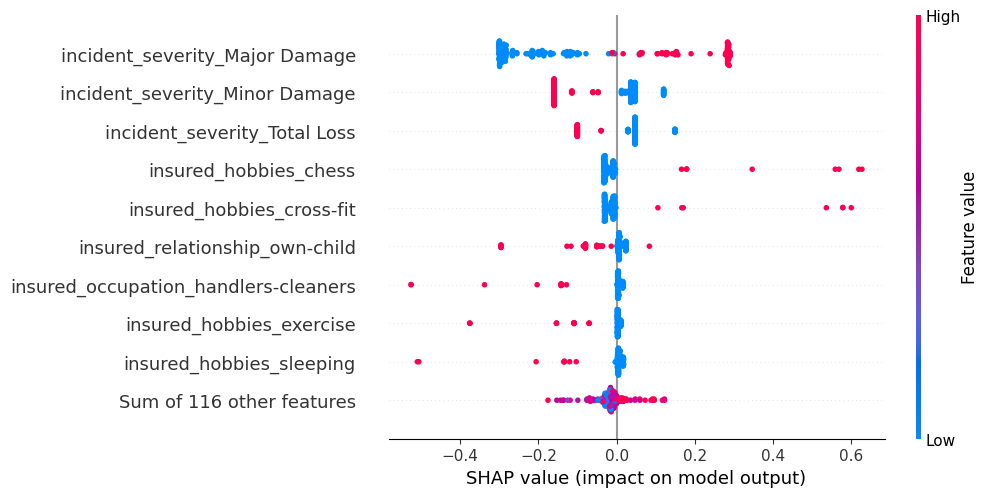

In [27]:
dt_model.shap_explanation(is_tree=True, class_to_observe=1)

# XGBoost

## Dataset Creation

In [28]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [29]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [30]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [31]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [32]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [33]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [34]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

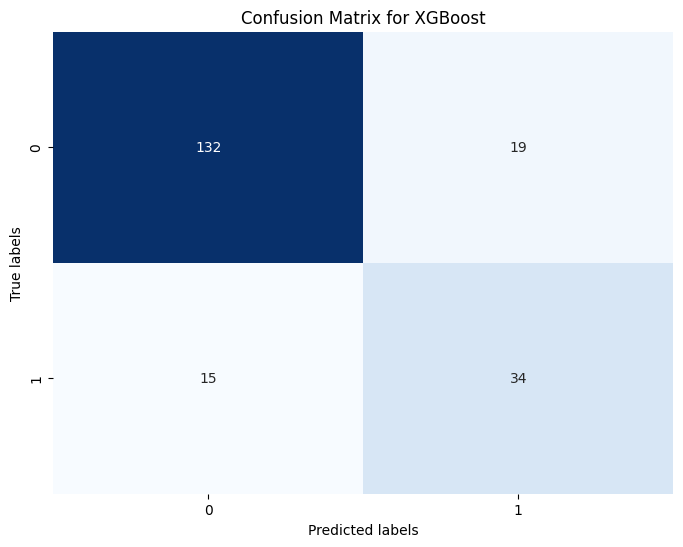

In [35]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [36]:
xgb_model.finetune()

[I 2024-04-04 17:36:00,907] A new study created in memory with name: no-name-4bf0b659-93c4-4e32-85e3-ca9aa59b986f
[I 2024-04-04 17:36:01,814] Trial 0 finished with value: 0.7533744856304961 and parameters: {'n_estimators': 45, 'max_depth': 3, 'learning_rate': 0.31, 'subsample': 0.7, 'colsample_bytree': 0.65, 'gamma': 4.4, 'reg_alpha': 3.6, 'reg_lambda': 0.2}. Best is trial 0 with value: 0.7533744856304961.
[I 2024-04-04 17:36:02,803] Trial 1 finished with value: 0.54440485617909 and parameters: {'n_estimators': 25, 'max_depth': 34, 'learning_rate': 0.06999999999999999, 'subsample': 0.5, 'colsample_bytree': 0.25, 'gamma': 2.3000000000000003, 'reg_alpha': 3.6, 'reg_lambda': 0.9}. Best is trial 0 with value: 0.7533744856304961.
[I 2024-04-04 17:36:03,530] Trial 2 finished with value: 0.7443441315667035 and parameters: {'n_estimators': 12, 'max_depth': 31, 'learning_rate': 0.43, 'subsample': 0.45, 'colsample_bytree': 0.65, 'gamma': 2.8000000000000003, 'reg_alpha': 2.4000000000000004, 'reg_

(0.7594723026700587,
 {'n_estimators': 32,
  'max_depth': 16,
  'learning_rate': 0.34,
  'subsample': 0.45,
  'colsample_bytree': 0.5,
  'gamma': 4.0,
  'reg_alpha': 4.4,
  'reg_lambda': 1.8})

In [37]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.625,
 'recall': 0.8163265306122449,
 'f1_score': 0.7079646017699115}

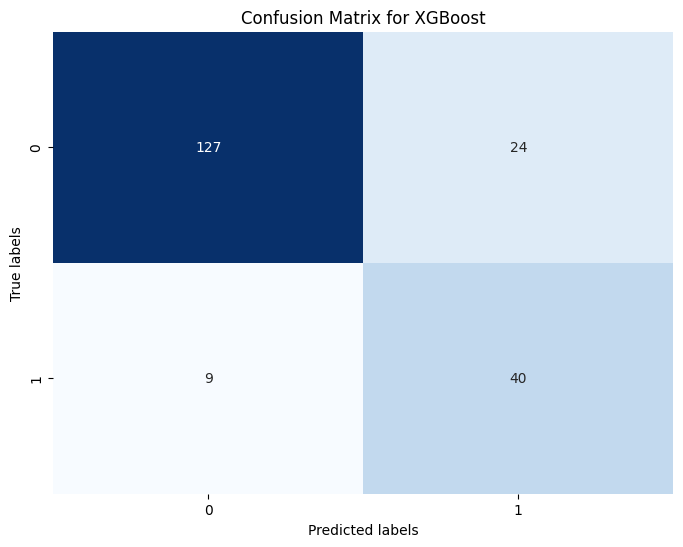

In [38]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

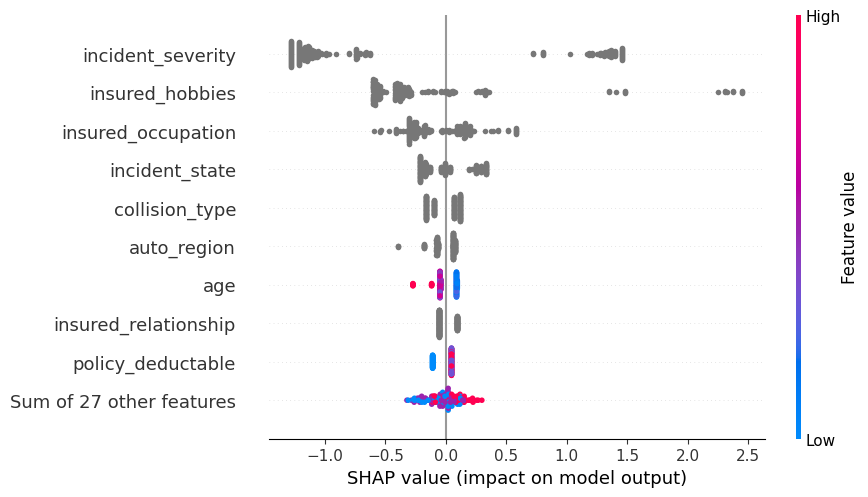

In [39]:
xgb_model.shap_explanation()

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

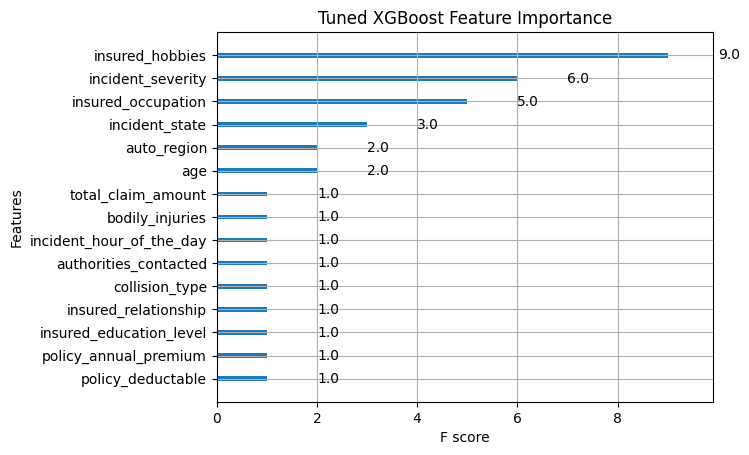

In [40]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")